# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import os
import pickle
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
## Imports
import tensorflow as tf2
import tensorflow_addons as tfa
from  sklearn.utils import shuffle
# Visualizations will be shown in the notebook.from sklearn.utils import shuffle
%matplotlib inline

test_run = False

In [2]:
# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

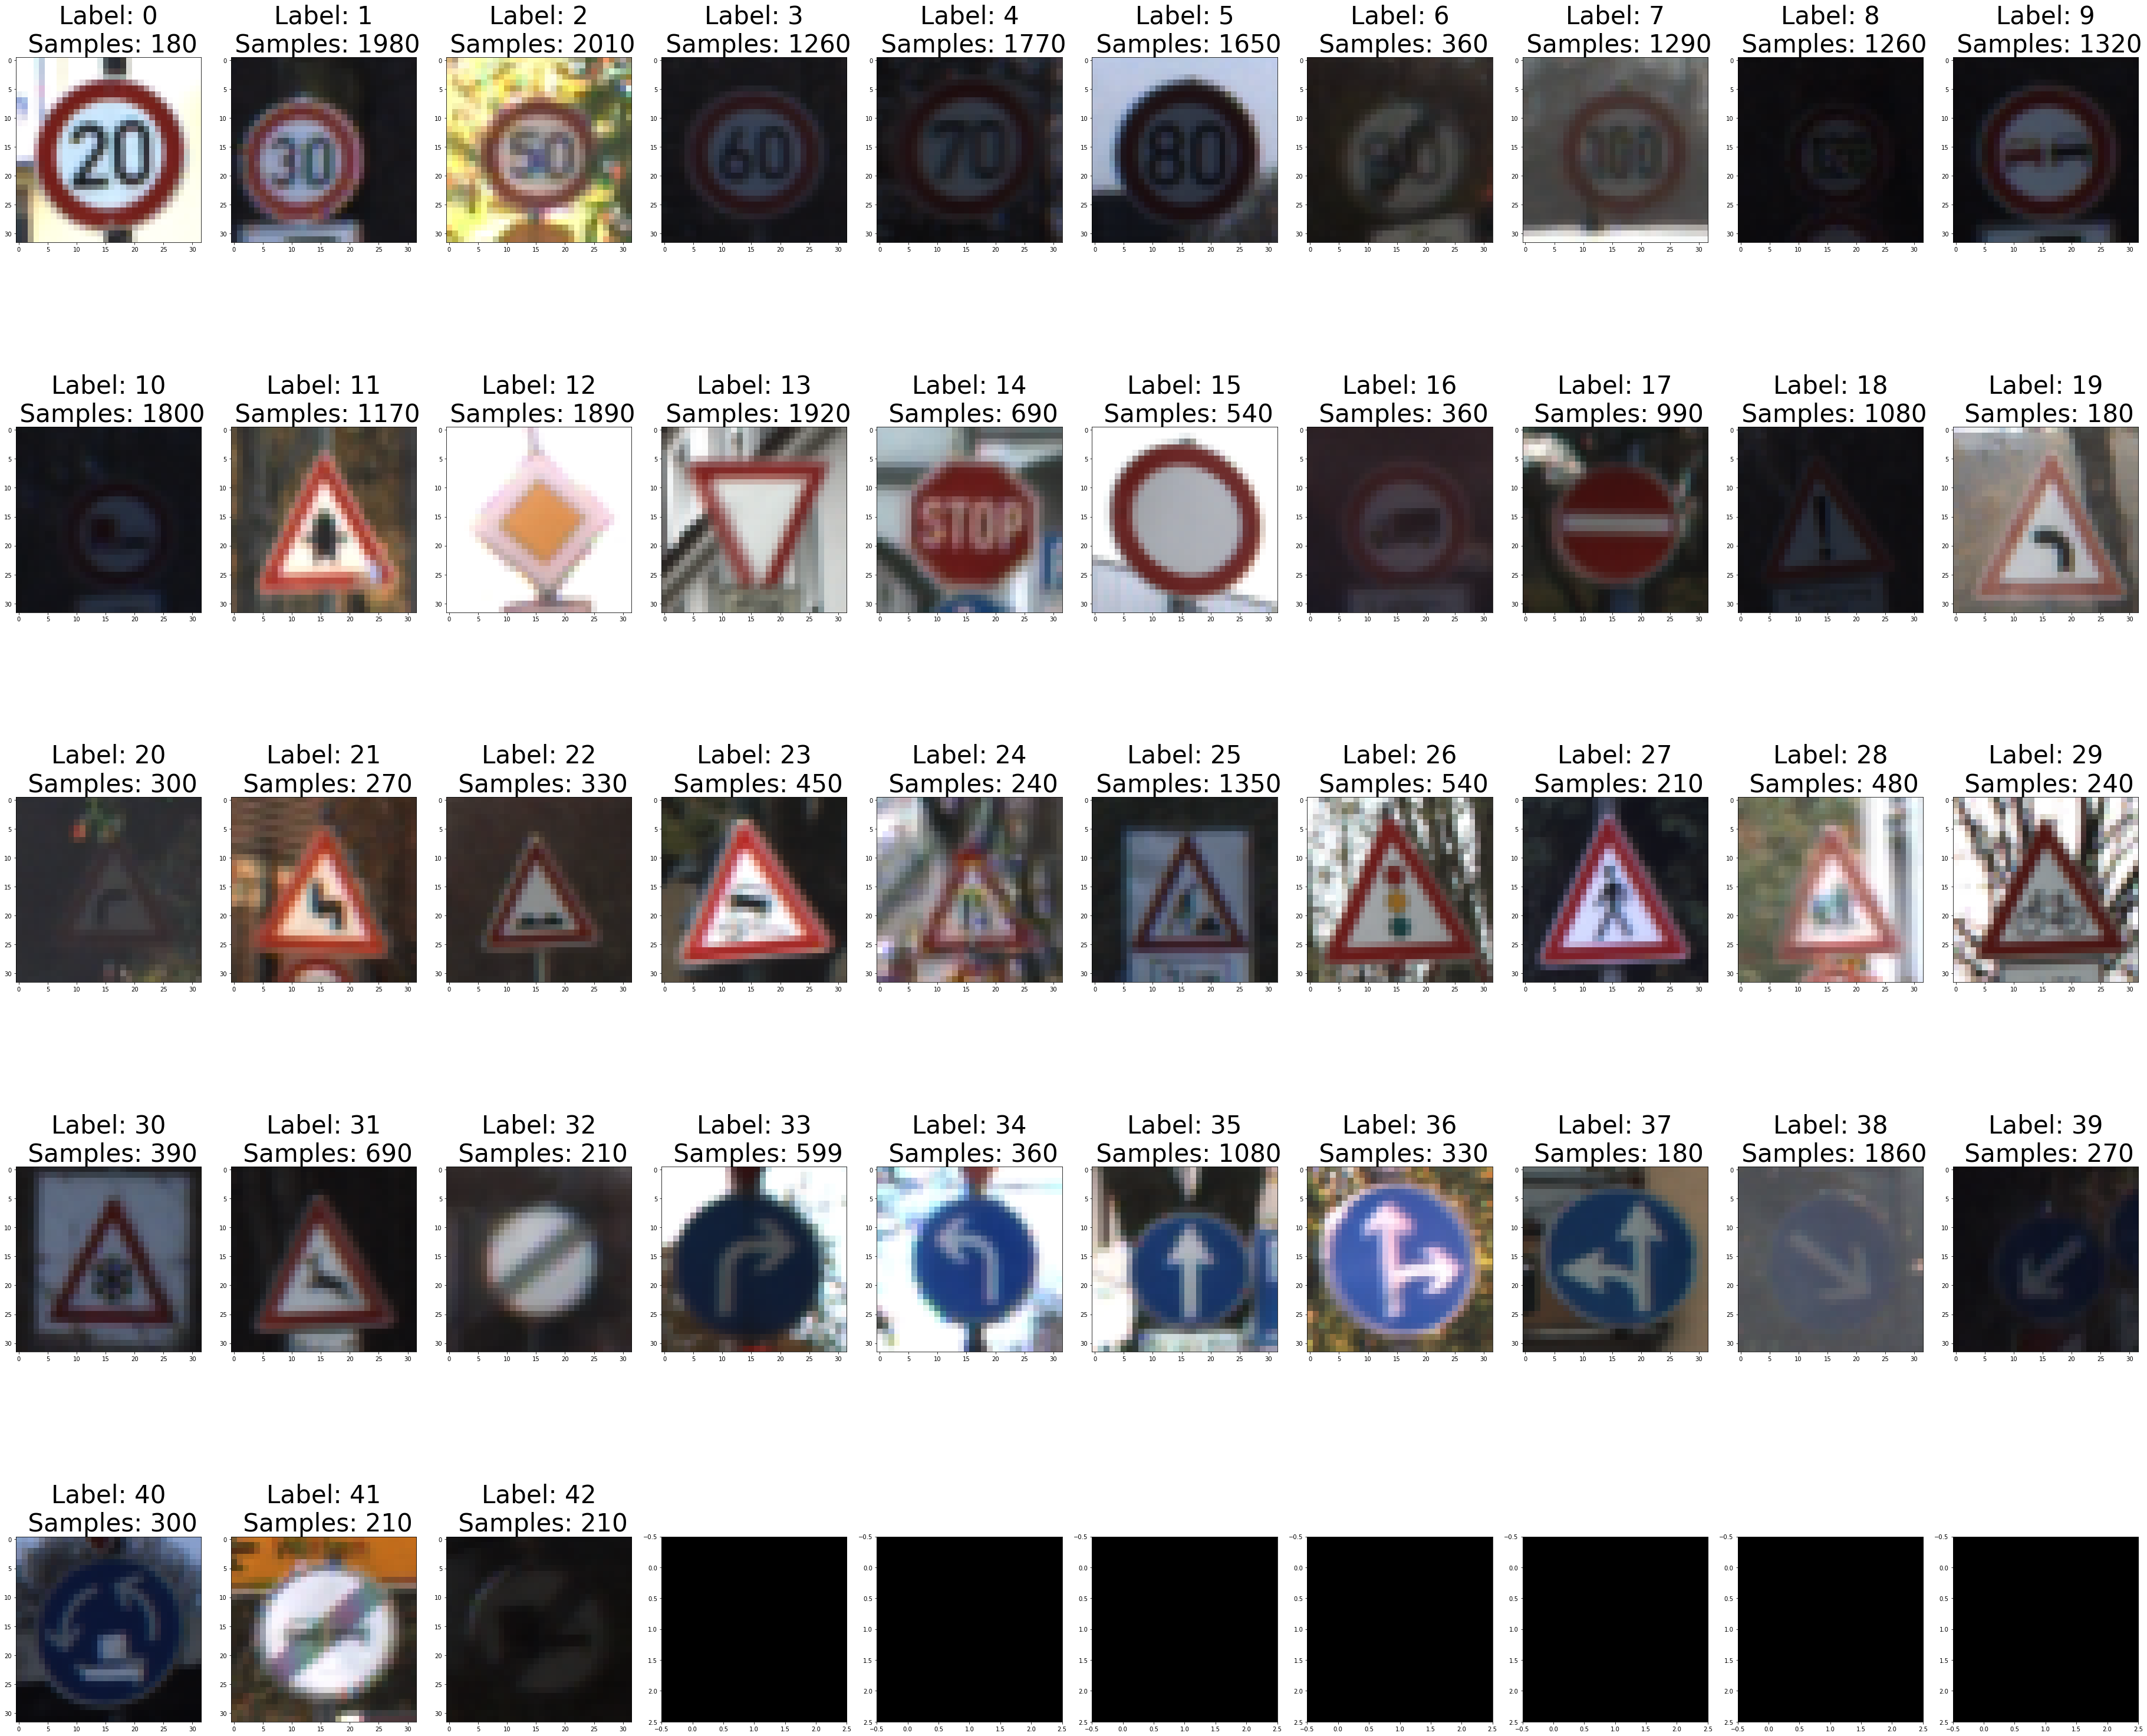

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.


# show a random pictore for each lable class

unique_labels = np.sort(pd.unique(y_train))
n_img_col = 10
# plotting with subplots
f, axs = plt.subplots(len(unique_labels)//n_img_col +1, n_img_col, figsize=(50,50))
col_counter = 0
row_counter = 0
for unique in unique_labels:
    label_subset = np.where(y_train==unique)[0]
    rand_label_array_ind = random.randint(0, len(label_subset)-1)
    index = label_subset[rand_label_array_ind]
    # print(f"UL : {unique} Rand POs: {rand_label_array_ind} Index : {index}")
    image = X_train[index].squeeze()

    axs[row_counter, col_counter].imshow(image)
    axs[row_counter, col_counter].set_title("Label: " + str(unique) + f"\n Samples: {len(label_subset)}", fontsize=42)

    col_counter += 1
    if col_counter >= n_img_col:
        col_counter = 0
        row_counter += 1

# fill missing images
while col_counter < n_img_col:
    axs[row_counter, col_counter].imshow(np.zeros([3,3,3]))
    col_counter += 1

plt.tight_layout()
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
f.savefig("result_images/input_images_dataset.png")
plt.show()

In [5]:
# Plot number of images per class as bar chart
def plot_number_of_samples_per_class(y_input, save_file):
    unique_elements, counts_elements = np.unique(y_input, return_counts = True)
    plt.bar( np.arange( len(unique_elements) ), counts_elements, align='center' )
    plt.ylabel('Training samples')
    plt.xlabel('Classes')
    plt.xlim([-1, len(unique_elements)])
    plt.savefig(save_file)
    plt.show()


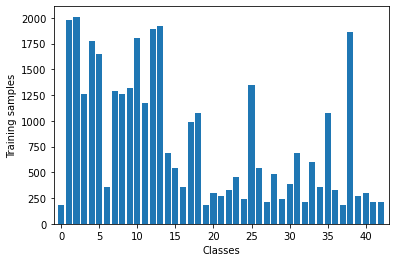

In [6]:
plot_number_of_samples_per_class(y_train, save_file="result_images/sample_counts_classes.png")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
def data_preprocessing(image, random_factor=False):
    """
    change the image for better generalization
    Add rotation
    Add translation
    :param random_factor: apply a random rotation and translation
    :param image:
    :return: transformed image
    """
    if random_factor:
        flip = 1 if random.randint(0,1) == 1 else -1
        r = random.random() * flip
    else:
        r = 1
    # rotation
    img = tfa.image.rotate(image, tf2.constant((np.pi/8) * r))

    # Translation
    img = tfa.image.translate(img, [3*r,6*r])
    return img.numpy()

def oversampel_dataset(X_input, y_input, min_number_records=3000):
    """
    :param min_number_records: Number of samples for each subclass needed
    :param X_input: feature images
    :param y_input: labels
    :return: Updates features , labels
    """

    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
    unique_labels = np.sort(np.unique(y_input))
    for class_label in unique_labels:
        label_subset = np.where(y_input==class_label)[0]

        missing_samples = min_number_records - len(label_subset)
        if missing_samples > 0:
            print(f"[Class {class_label}] Need additional {missing_samples} images")
            print("Create sample patch from original data")
            while True:
                print(f"Process images. {missing_samples} samples remain")
                new_data = data_preprocessing(X_input[label_subset][:missing_samples], random_factor=True)
                X_input = np.concatenate((X_input, new_data))
                y_input = np.concatenate((y_input, [class_label for _ in range(len(new_data))]))
                missing_samples = missing_samples - len(new_data)
                if missing_samples <= 0:
                    break
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
    return X_input, y_input

In [8]:
def image_transformation_sample(X_input, y_input, save_file, transformed=False, signnames_file="./signnames.csv"):
    # load sign names
    sign_names = pd.read_csv(signnames_file).iloc[:,1].to_dict()
    unique_labels = pd.read_csv(signnames_file).iloc[:,0].astype(int)
    n_img_col = 10
    # plotting with subplots
    f, axs = plt.subplots(len(unique_labels)//n_img_col +1, n_img_col, figsize=(93,93))
    col_counter = 0
    row_counter = 0
    for unique in unique_labels:
        print(f"Take image for {unique} - {sign_names[unique]}", end="")
        label_subset = np.where(y_input.astype(int)==unique)[0]
        if len(label_subset) > 0:
            rand_label_array_ind = random.randint(0, len(label_subset)-1)
            index = label_subset[rand_label_array_ind]
            print(f"UL : {unique} Rand POs: {rand_label_array_ind} Index : {index}")
            image = X_input[index].squeeze()
            if transformed:
                image = data_preprocessing(image, random_factor=True)
            print("")
        else:
            print(" > No data for")
            image = np.zeros([3,3,3])
        axs[row_counter, col_counter].imshow(image)
        axs[row_counter, col_counter].set_title(f"Label {unique}\n{sign_names[unique]}\n Samples:{len(label_subset)}" , fontsize=50)

        col_counter += 1
        if col_counter >= n_img_col:
            col_counter = 0
            row_counter += 1

    # fill missing images
    while col_counter < n_img_col:
        axs[row_counter, col_counter].imshow(np.zeros([3,3,3]))
        col_counter += 1

    plt.tight_layout()
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.savefig(save_file)
    plt.show()

Take image for 0 - Speed limit (20km/h)UL : 0 Rand POs: 164 Index : 10124

Take image for 1 - Speed limit (30km/h)UL : 1 Rand POs: 1011 Index : 3231

Take image for 2 - Speed limit (50km/h)UL : 2 Rand POs: 358 Index : 31797

Take image for 3 - Speed limit (60km/h)UL : 3 Rand POs: 21 Index : 5391

Take image for 4 - Speed limit (70km/h)UL : 4 Rand POs: 1590 Index : 8400

Take image for 5 - Speed limit (80km/h)UL : 5 Rand POs: 1457 Index : 13817

Take image for 6 - End of speed limit (80km/h)UL : 6 Rand POs: 311 Index : 21761

Take image for 7 - Speed limit (100km/h)UL : 7 Rand POs: 298 Index : 24028

Take image for 8 - Speed limit (120km/h)UL : 8 Rand POs: 77 Index : 15947

Take image for 9 - No passingUL : 9 Rand POs: 678 Index : 11718

Take image for 10 - No passing for vehicles over 3.5 metric tonsUL : 10 Rand POs: 486 Index : 17616

Take image for 11 - Right-of-way at the next intersectionUL : 11 Rand POs: 338 Index : 8918

Take image for 12 - Priority roadUL : 12 Rand POs: 324 Inde

C:\Users\SilasUlrich\Anaconda3\envs\IntroToTensorFlow\lib\site-packages\tensorflow_addons\image\transform_ops.py:143: UserWarning: fill_value is not supported and is always 0 for TensorFlow < 2.4.0.
  "fill_value is not supported and is always 0 for TensorFlow < 2.4.0."
C:\Users\SilasUlrich\Anaconda3\envs\IntroToTensorFlow\lib\site-packages\tensorflow\python\autograph\impl\api.py:493: UserWarning: fill_value is not supported and is always 0 for TensorFlow < 2.4.0.
  return py_builtins.overload_of(f)(*args)


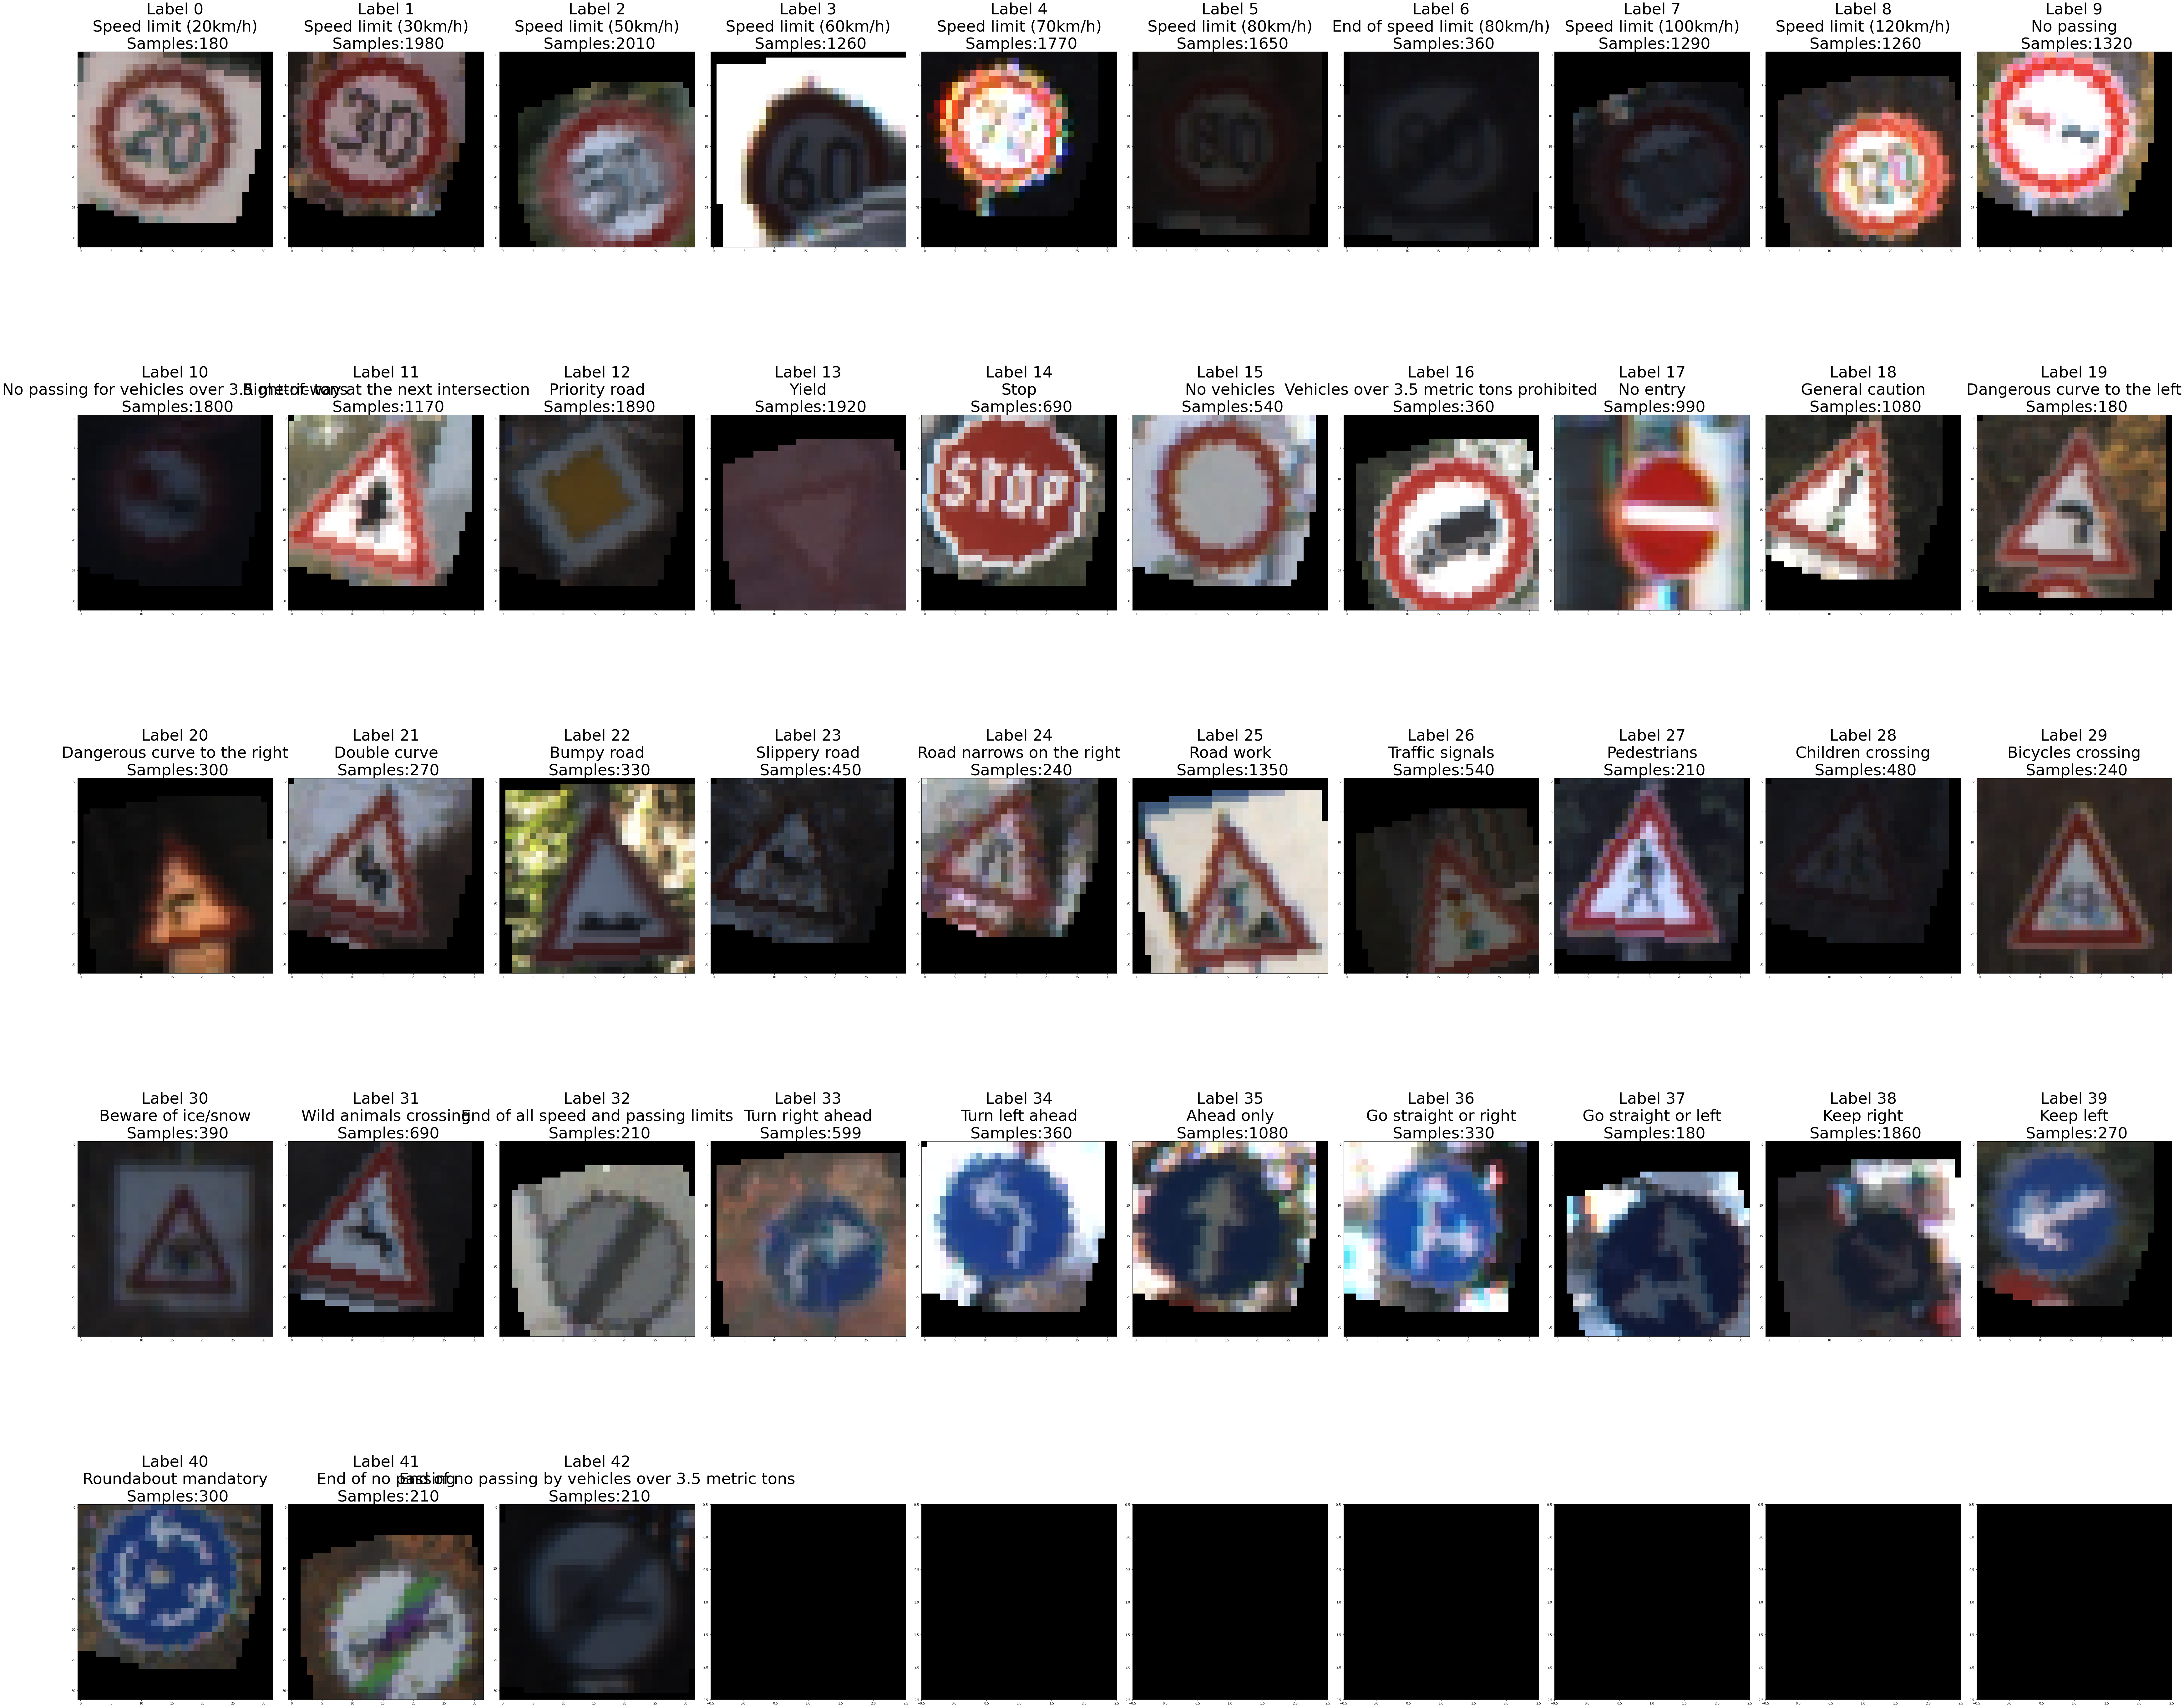

In [9]:
image_transformation_sample(X_train, y_train, transformed=True, save_file="result_images/image_transformations.png")

[Class 0] Need additional 3820 images
Create sample patch from original data
Process images. 3820 samples remain
Process images. 3640 samples remain
Process images. 3460 samples remain
Process images. 3280 samples remain
Process images. 3100 samples remain
Process images. 2920 samples remain
Process images. 2740 samples remain
Process images. 2560 samples remain
Process images. 2380 samples remain
Process images. 2200 samples remain
Process images. 2020 samples remain
Process images. 1840 samples remain
Process images. 1660 samples remain
Process images. 1480 samples remain
Process images. 1300 samples remain
Process images. 1120 samples remain
Process images. 940 samples remain
Process images. 760 samples remain
Process images. 580 samples remain
Process images. 400 samples remain
Process images. 220 samples remain
Process images. 40 samples remain
[Class 1] Need additional 2020 images
Create sample patch from original data
Process images. 2020 samples remain
Process images. 40 sample

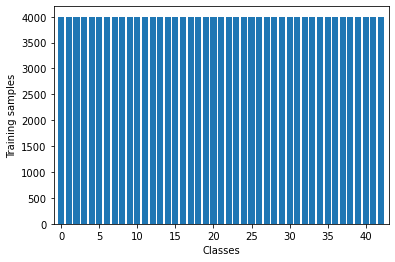

In [10]:
X_train, y_train =  oversampel_dataset(X_train, y_train, min_number_records=4000 if not test_run else 500)

plot_number_of_samples_per_class(y_train, save_file="result_images/oversample_sample_counts_classes.png")

In [11]:
# adjust contrast

X_train = tf2.image.adjust_contrast(X_train, 2).numpy()
X_valid = tf2.image.adjust_contrast(X_valid, 2).numpy()
X_test = tf2.image.adjust_contrast(X_test, 2).numpy()

In [12]:
X_train = tf2.image.rgb_to_grayscale(X_train).numpy()
X_valid = tf2.image.rgb_to_grayscale(X_valid).numpy()
X_test = tf2.image.rgb_to_grayscale(X_test).numpy()

In [13]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include
X_train = (X_train / 255.) - 0.5
X_test = (X_test / 255.) - 0.5
X_valid = (X_valid /255.) - 0.5


### Model Architecture
#### This part only supports tensorflow v1


In [14]:
import tensorflow._api.v2.compat.v1 as tf
print(f"Tensorflow Version: {tf.__version__}. Load v1 compat and disable eager mode")
tf.disable_eager_execution()

Tensorflow Version: 2.3.0. Load v1 compat and disable eager mode


In [15]:
debug = True

def conv2d_layer_1(input):
    # Filter (weights and bias)
    out_depth = 6
    weight_size = (5, 5, 1, out_depth)
    F_W = tf.Variable(tf.truncated_normal(weight_size))
    F_b = tf.Variable(tf.zeros(out_depth))
    strides = [1, 1, 1, 1]
    padding = 'VALID'
    if debug:
        in_depth = 1
        in_height = in_width =  32
        out_height = int(float(in_height - weight_size[0] ) // float(strides[1])) +1
        out_width  = int(float(in_width - weight_size[1] ) // float(strides[2])) +1
        print(f"[Layer 1] Conv2d {in_height}x{in_width}x{in_depth} --> {out_height}x{out_width}x{out_depth}")
    else:
        return tf.nn.conv2d(input, F_W, strides, padding) + F_b

def short_cut_layer_2(input):
    """
    32x32x1 to 28x28x16
    :param input:
    :return:
    """
    ksize = [1, 1, 1, 1]
    strides = [1, 1, 1, 1]
    padding = 'SAME'
    P = 1
    if debug:
        depth = 16
        in_height = in_width =  32
        out_height = int(float(in_height - ksize[1]  ) / float(strides[1])) + P
        out_width  = int(float(in_width - ksize[2] ) / float(strides[2])) + P
        print(f"[Layer 1] Shortcut {in_height}x{in_width}x{depth} --> {out_height}x{out_width}x{depth}")
    else:
        return tf.nn.max_pool(input, ksize, strides, padding)


def short_cut_layer_3(input):
    """
    10x10x16 to 5x5x16
    :param input:
    :return:
    """
    ksize = [1, 1, 1, 1]
    strides = [1, 2, 2, 1]
    padding = 'SAME'
    P = 1
    if debug:
        depth = 16
        in_height = in_width =  10
        out_height = int(float(in_height - ksize[1]  ) / float(strides[1])) + P
        out_width  = int(float(in_width - ksize[2] ) / float(strides[2])) + P
        print(f"[Layer 1] Shortcut {in_height}x{in_width}x{depth} --> {out_height}x{out_width}x{depth}")
    else:
        return tf.nn.max_pool(input, ksize, strides, padding)

def relu_activision(input):
    if debug:
        print(f"[Layer -] ReLu Activision")
    else:
        return tf.nn.relu(input)

def maxpooling_layer_1(input):
    ksize = [1, 2, 2, 1]
    strides = [1, 2, 2, 1]
    padding = 'SAME'
    P = 1
    if debug:
        depth = 16
        in_height = in_width =  28
        out_height = int(float(in_height - ksize[1]  ) / float(strides[1])) +1
        out_width  = int(float(in_width - ksize[2] ) / float(strides[2])) +1
        print(f"[Layer 1] Maxpooling {in_height}x{in_width}x{depth} --> {out_height}x{out_width}x{depth}")
    else:
        return tf.nn.max_pool(input, ksize, strides, padding)

def conv2d_layer_2(input):
    # Filter (weights and bias)
    out_depth = 16
    weight_size = (5, 5, 6, out_depth) # h w d_in d_out
    F_W = tf.Variable(tf.truncated_normal(weight_size))
    F_b = tf.Variable(tf.zeros(out_depth))
    strides = [1, 1, 1, 1]
    padding = 'VALID'
    if debug:
        in_depth = 6
        in_height = in_width =  14
        out_height = int(float(in_height - weight_size[0] ) // float(strides[1])) +1
        out_width  = int(float(in_width - weight_size[1] ) // float(strides[2])) +1
        print(f"[Layer 2] Conv2d {in_height}x{in_width}x{in_depth} --> {out_height}x{out_width}x{out_depth}")
    else:
        return tf.nn.conv2d(input, F_W, strides, padding) + F_b

def maxpooling_layer_2(input):
    ksize = [1, 1, 1, 1]
    strides = [1, 2, 2, 1]
    padding = 'SAME'
    P = 1
    if debug:
        depth = 16
        in_height = in_width =  10
        out_height = int(float(in_height - ksize[1]) / float(strides[1])) +1
        out_width  = int(float(in_width - ksize[2]) / float(strides[2])) +1
        print(f"[Layer 2] Maxpooling {in_height}x{in_width}x{depth} --> {out_height}x{out_width}x{depth}")
    else:
        return tf.nn.max_pool(input, ksize, strides, padding)

def flattening_layer_3(input, output_size):
    if debug:
        input_height = input_width = 5
        depth = 16
        print(f"[Layer 3] {input_height}x{input_width}x{depth} --> 1x{output_size}")
    else:
        return tf.reshape(input, [-1, output_size])


def fully_connected(input, input_size, output_size, mu, sigma):
    if debug:
        print(f"[Layer -] 1x{input_size} --> 1x{output_size}")
    else:
        fc1_W = tf.Variable(tf.truncated_normal(shape=(input_size, output_size), mean = mu, stddev = sigma))
        fc1_b = tf.Variable(tf.zeros(output_size))
        return tf.matmul(input, fc1_W) + fc1_b

print("Net summary ==============")
conv2d_layer_1(None)
# short_cut_layer_2(None)
relu_activision(None)
maxpooling_layer_1(None)

conv2d_layer_2(None)
#short_cut_layer_3(None)
relu_activision(None)
maxpooling_layer_2(None)

flattening_layer_3(None, 512)
fully_connected(None, 512, 256, 0, 0)
relu_activision(None)
fully_connected(None, 256, 124, 0, 0)
relu_activision(None)
fully_connected(None, 124, 42, 0, 0)

debug = False

Net summary ==============
[Layer 1] Conv2d 32x32x1 --> 28x28x6
[Layer -] ReLu Activision
[Layer 1] Maxpooling 28x28x16 --> 14x14x16
[Layer 2] Conv2d 14x14x6 --> 10x10x16
[Layer -] ReLu Activision
[Layer 2] Maxpooling 10x10x16 --> 5x5x16
[Layer 3] 5x5x16 --> 1x512
[Layer -] 1x512 --> 1x256
[Layer -] ReLu Activision
[Layer -] 1x256 --> 1x124
[Layer -] ReLu Activision
[Layer -] 1x124 --> 1x42


In [16]:
def LeNet(x, class_n=10):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    x = conv2d_layer_1(x)

    # TODO: Activation.
    x = relu_activision(x)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    x = maxpooling_layer_1(x)

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    x = conv2d_layer_2(x)

    # TODO: Activation.
    x = relu_activision(x)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    x = maxpooling_layer_2(x)

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    x = flattening_layer_3(x, 400)

    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    x = fully_connected(x, 400, 120, mu, sigma)

    # TODO: Activation.
    x = relu_activision(x)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    x = fully_connected(x, 120, 84, mu, sigma)

    # TODO: Activation.
    x = relu_activision(x)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    logits = fully_connected(x, 84, class_n, mu, sigma)

    return logits

In [17]:

def ParallelNet(x, class_n=10, dropout_keep=0.3):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    dropout_rate = 1 - dropout_keep

    # TODO: Layer 1: Convolutional 32x32 -> 28x28
    # 3x convolution with 1x1, 3x3, 5x5 filter
    # concat all layer together = 3x out dim
    l1_depth = 6
    l1_1 = tf.nn.conv2d(input=x,
                     filter=tf.Variable(tf.truncated_normal((5, 5, 1, l1_depth))),
                     strides=[1,1,1,1],
                     padding='VALID') + tf.Variable(tf.zeros(l1_depth))
    l1_2 = tf.nn.conv2d(input=x,
                     filter=tf.Variable(tf.truncated_normal((3, 3, 1, l1_depth))),
                     strides=[1,1,1,1],
                     padding='VALID') + tf.Variable(tf.zeros(l1_depth))
    l1_3 = tf.nn.conv2d(input=x,
                     filter=tf.Variable(tf.truncated_normal((1, 1, 1, l1_depth))),
                     strides=[1,1,1,1],
                     padding='VALID') + tf.Variable(tf.zeros(l1_depth))
    # TODO: Activation.
    l1_1 = tf.nn.relu(l1_1)
    l1_2 = tf.nn.relu(l1_2)
    l1_3 = tf.nn.relu(l1_3)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    # TODO: Pooling. Input = 30x30x6. Output = 14x14x6.
    # TODO: Pooling. Input = 32x32x6. Output = 14x14x6.
    l1_1 = tf.nn.max_pool(l1_1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    l1_2 = tf.nn.max_pool(l1_2, ksize=[1,4,4,1], strides=[1,2,2,1], padding='VALID')
    l1_3 = tf.nn.max_pool(l1_3, ksize=[1,6,6,1], strides=[1,2,2,1], padding='VALID')

    # l1_out = tf.concat([l1_1, l1_2, l1_3], 0)

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    l2_depth = l1_depth * 2
    in_depth = l1_depth
    l2_1 = tf.nn.conv2d(input=l1_1,
                     filter=tf.Variable(tf.truncated_normal((5, 5, in_depth, l2_depth))),
                     strides=[1,1,1,1],
                     padding='VALID') + tf.Variable(tf.zeros(l2_depth))
    l2_2 = tf.nn.conv2d(input=l1_2,
                     filter=tf.Variable(tf.truncated_normal((3, 3, in_depth, l2_depth))),
                     strides=[1,1,1,1],
                     padding='VALID') + tf.Variable(tf.zeros(l2_depth))
    l2_3 = tf.nn.conv2d(input=l1_3,
                     filter=tf.Variable(tf.truncated_normal((1, 1, in_depth, l2_depth))),
                     strides=[1,1,1,1],
                     padding='VALID') + tf.Variable(tf.zeros(l2_depth))
   # TODO: Activation.
    l2_1 = tf.nn.relu(l2_1)
    l2_2 = tf.nn.relu(l2_2)
    l2_3 = tf.nn.relu(l2_3)

    # TODO: Pooling. Input = 14x14x24. Output = 5x5x24.
    l2_1 = tf.nn.max_pool(l2_1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    l2_2 = tf.nn.max_pool(l2_2, ksize=[1,4,4,1], strides=[1,2,2,1], padding='VALID')
    l2_3 = tf.nn.max_pool(l2_3, ksize=[1,6,6,1], strides=[1,2,2,1], padding='VALID')

    l2_out = tf.concat([l2_1, l2_2, l2_3], 1)

    # TODO: Flatten. Input = 5x5x24. Output = 400.
    print("Layer 2 shape")
    print(l2_out.shape)
    print(l2_out)
    fc1 = flattening_layer_3(l2_out, 900)
    print("FC 1")
    print(fc1.shape)
    # TODO: Layer 3: Fully Connected.
    fc1 = fully_connected(fc1, 900, 512, mu, sigma)
    fc1 = tf.nn.dropout(fc1, rate=dropout_rate)

    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected.
    fc2 = fully_connected(fc1, 512, 128, mu, sigma)
    fc2 = tf.nn.dropout(fc2, rate=dropout_rate)
    print("FC 2")
    print(fc2.shape)
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)

    # TODO: Layer 5: Fully Connected.
    logit_out = fully_connected(fc2, 128, class_n, mu, sigma)
    print("Logit out")
    print(logit_out.shape)
    return logit_out


In [53]:

def BlockNet(x, class_n=10, dropout_keep=0.3):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    dropout_rate = 1 - dropout_keep

    # TODO: Layer 1: Convolutional 32x32 -> 28x28
    # 3x convolution with 1x1, 3x3, 5x5 filter
    # concat all layer together = 3x out dim
    l1_depth = 6
    l1_1 = tf.nn.conv2d(input=x,
                     filter=tf.Variable(tf.truncated_normal((5, 5, 1, l1_depth))),
                     strides=[1,1,1,1],
                     padding='VALID') + tf.Variable(tf.zeros(l1_depth))
    l1_2 = tf.nn.conv2d(input=x,
                     filter=tf.Variable(tf.truncated_normal((3, 3, 1, l1_depth))),
                     strides=[1,1,1,1],
                     padding='VALID') + tf.Variable(tf.zeros(l1_depth))
    l1_3 = tf.nn.conv2d(input=x,
                     filter=tf.Variable(tf.truncated_normal((1, 1, 1, l1_depth))),
                     strides=[1,1,1,1],
                     padding='VALID') + tf.Variable(tf.zeros(l1_depth))
    # TODO: Activation.
    l1_1 = tf.nn.relu(l1_1)
    l1_2 = tf.nn.relu(l1_2)
    l1_3 = tf.nn.relu(l1_3)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    # TODO: Pooling. Input = 30x30x6. Output = 14x14x6.
    # TODO: Pooling. Input = 32x32x6. Output = 14x14x6.
    l1_1 = tf.nn.max_pool(l1_1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    l1_2 = tf.nn.max_pool(l1_2, ksize=[1,4,4,1], strides=[1,2,2,1], padding='VALID')
    l1_3 = tf.nn.max_pool(l1_3, ksize=[1,6,6,1], strides=[1,2,2,1], padding='VALID')

    l1_out = tf.concat([l1_1, l1_2, l1_3], 3)

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    l2_depth = (l1_depth * 3) * 2
    in_depth = l1_depth * 3
    l2_1 = tf.nn.conv2d(input=l1_out,
                     filter=tf.Variable(tf.truncated_normal((5, 5, in_depth, l2_depth))),
                     strides=[1,1,1,1],
                     padding='VALID') + tf.Variable(tf.zeros(l2_depth))
    l2_2 = tf.nn.conv2d(input=l1_out,
                     filter=tf.Variable(tf.truncated_normal((3, 3, in_depth, l2_depth))),
                     strides=[1,1,1,1],
                     padding='VALID') + tf.Variable(tf.zeros(l2_depth))
    l2_3 = tf.nn.conv2d(input=l1_out,
                     filter=tf.Variable(tf.truncated_normal((1, 1, in_depth, l2_depth))),
                     strides=[1,1,1,1],
                     padding='VALID') + tf.Variable(tf.zeros(l2_depth))
   # TODO: Activation.
    l2_1 = tf.nn.relu(l2_1)
    l2_2 = tf.nn.relu(l2_2)
    l2_3 = tf.nn.relu(l2_3)

    # TODO: Pooling. Input = 14x14x24. Output = 5x5x24.
    l2_1 = tf.nn.max_pool(l2_1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    l2_2 = tf.nn.max_pool(l2_2, ksize=[1,4,4,1], strides=[1,2,2,1], padding='VALID')
    l2_3 = tf.nn.max_pool(l2_3, ksize=[1,6,6,1], strides=[1,2,2,1], padding='VALID')

    l2_out = tf.concat([l2_1, l2_2, l2_3], 3)

    # TODO: Flatten. Input = 5x5x24. Output = 400.
    print("Layer 2 shape")
    print(l2_out.shape)
    print(l2_out)
    fc1 = flattening_layer_3(l2_out, 900*3)
    print("FC 1")
    print(fc1.shape)
    # TODO: Layer 3: Fully Connected.
    fc1 = fully_connected(fc1, 900*3, 512, mu, sigma)
    fc1 = tf.nn.dropout(fc1, rate=dropout_rate)

    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected.
    fc2 = fully_connected(fc1, 512, 128, mu, sigma)
    fc2 = tf.nn.dropout(fc2, rate=dropout_rate)
    print("FC 2")
    print(fc2.shape)
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)

    # TODO: Layer 5: Fully Connected.
    logit_out = fully_connected(fc2, 128, class_n, mu, sigma)
    print("Logit out")
    print(logit_out.shape)
    return logit_out


In [54]:
# setup tf vars
x = tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1], 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)

In [55]:
# Train net
rate = 0.001

# logits = LeNet(x, class_n=n_classes)
logits = BlockNet(x, class_n=n_classes, dropout_keep=keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Layer 2 shape
(None, 5, 5, 108)
Tensor("concat_10:0", shape=(None, 5, 5, 108), dtype=float32)
FC 1
(None, 2700)
FC 2
(None, 128)
Logit out
(None, 43)


### Train, Validate and Test the Model

In [56]:
BATCH_SIZE = 64
EPOCHS = 200 if not test_run else 10

In [57]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [58]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})

        print("Validate")
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    saver.save(sess, './lenet')
    print("Model saved")


Training...

Validate
EPOCH 1 ...
Validation Accuracy = 0.027

Validate
EPOCH 2 ...
Validation Accuracy = 0.034

Validate
EPOCH 3 ...
Validation Accuracy = 0.014

Validate
EPOCH 4 ...
Validation Accuracy = 0.054

Validate
EPOCH 5 ...
Validation Accuracy = 0.048

Validate
EPOCH 6 ...
Validation Accuracy = 0.034

Validate
EPOCH 7 ...
Validation Accuracy = 0.034

Validate
EPOCH 8 ...
Validation Accuracy = 0.007

Validate
EPOCH 9 ...
Validation Accuracy = 0.014

Validate
EPOCH 10 ...
Validation Accuracy = 0.007

Validate
EPOCH 11 ...
Validation Accuracy = 0.034

Validate
EPOCH 12 ...
Validation Accuracy = 0.014

Validate
EPOCH 13 ...
Validation Accuracy = 0.027

Validate
EPOCH 14 ...
Validation Accuracy = 0.027

Validate
EPOCH 15 ...
Validation Accuracy = 0.014

Validate
EPOCH 16 ...
Validation Accuracy = 0.034



KeyboardInterrupt: 

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Evaluation
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
# python script for reading the GTSRB image dataset from https://benchmark.ini.rub.de/gtsrb_dataset.html with additional size adjustments and python3 supp
from readTrafficSigns import readTrafficSigns

gtsrb_images, gtsrb_labels = readTrafficSigns("./traffic-signs-data/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/")

In [ ]:
# convert data to a pipeline readable format
gtsrb_labels = np.array(gtsrb_labels).reshape(-1)
gtsrb_images = np.asarray(gtsrb_images)

In [ ]:
image_transformation_sample(gtsrb_images, gtsrb_labels, save_file="result_images/gtsrb_image_transformations.png")

In [ ]:
# shuffle and take 5
gtsrb_images, gtsrb_labels = shuffle(gtsrb_images, gtsrb_labels)
gtsrb_images_subset = gtsrb_images[:5]
gtsrb_labels_subset = gtsrb_labels[:5]

In [ ]:
gtsrb_images_subset = gtsrb_images_subset / 255.

### Predict the Sign Type for Each Image

In [ ]:
# cross_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
# accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
# loss_operation = tf.reduce_mean(cross_entropy)

test_preds = tf.nn.softmax(logits)
test_correct_preds = tf.equal(tf.argmax(test_preds, 1), tf.cast(y[0], tf.int64))
test_accuracy = tf.cast(test_correct_preds, tf.float32)
test_top_five_preds = tf.nn.top_k(test_preds, 5)

def predict_new_data(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    results = {}
    for offset in range(0, num_examples, 1):
        batch_x, batch_y = np.expand_dims(np.stack((X_data[offset] ,)*1, axis=-1),axis=0), np.expand_dims(np.stack((y_data[offset] ,)*1, axis=-1),axis=0)
        print(f"Image with label {batch_y[0]}")
        (logit_result, accuracy, top_five_preds,) = sess.run([logits, test_accuracy, test_top_five_preds], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
        results[str(offset)] = [logit_result, accuracy, top_five_preds]
    return results

### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Run prediction & analyze performance

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    result = predict_new_data(gtsrb_images_subset, gtsrb_labels_subset)
    total_acc = 0.
    batch = 0
    for data_result in result:
        logit_result, accuracy_result, top_f = result[data_result]
        total_acc += accuracy_result[0]
        print("--------------------------------")
        print(f"Input Label   : {gtsrb_labels_subset[batch]}" )
        print(f"Output Result : {np.argmax(logit_result,1)[0]}" )
        print(f"Top 5  SM     : " , end="\n\t")
        for pos in range(len(gtsrb_images_subset)):
            print("{} - {:.10f}".format(top_f.indices[0][pos], top_f.values[0][pos]), end="\n\t")
        print(f"Accuracy      : {accuracy_result[0]}" )
        batch += 1
    total_acc = total_acc / len(gtsrb_images_subset)
    print("===============================")
    print("Test Accuracy = {:.2f}%".format(total_acc*100))




In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")